In [2]:
from master3 import *

plt_backend
PID: 98859


In [3]:
fnames_slave = sorted(glob.glob(
    '/Users/mmaahn/data/VISSS_data/visss2_visss_slave_*.nc'))
fnames_master = sorted(glob.glob(
    '/Users/mmaahn/data/VISSS_data/visss1_visss_master_*.nc'))





In [6]:

fnames = sorted(glob.glob(
f'/Users/mmaahn/data/VISSS_data//mosaic_retrieval/*master*nc'))

dat = {'master':None,
      'slave':None,
      }

for fname in fnames:


    
    master = xr.open_dataset(fname)
    try:
        slave = xr.open_dataset(fname.replace('visss1', 'visss2').replace('master', 'slave').replace('S1145792','S1143155'))
    except:
        slave = None
        
    try:
        dat = {'master':xr.concat((dat['master'], master), dim='time'),
          'slave':xr.concat((dat['slave'], slave), dim='time'),
          }
    except TypeError:
            dat = {'master': master,
          'slave':slave,
          }



In [7]:
for inst in ['master', 'slave']:
    dat[inst]['angle'] = dat[inst]['angle'] * -1
    dat[inst]['Dmax'] = dat[inst]['Dmax'] * 0.060
    dat[inst]['Dmin'] = dat[inst]['Dmin'] * 0.060

    dat[inst]['perimeter'] = dat[inst]['perimeter'] * 0.060
    dat[inst]['area'] = dat[inst]['area'] * 0.060**2

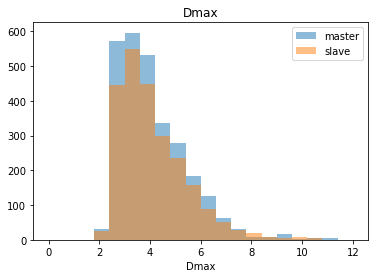

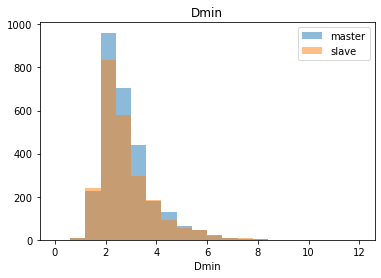

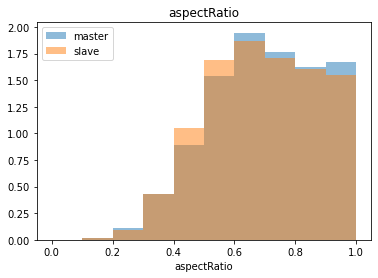

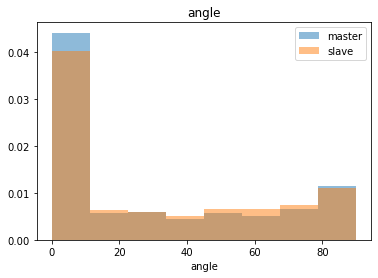

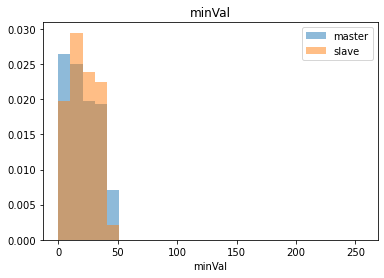

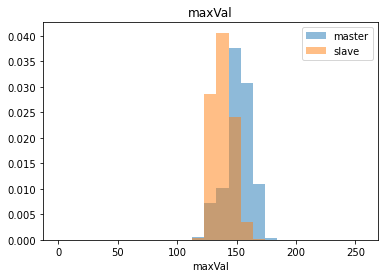

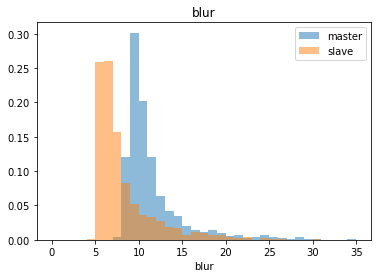

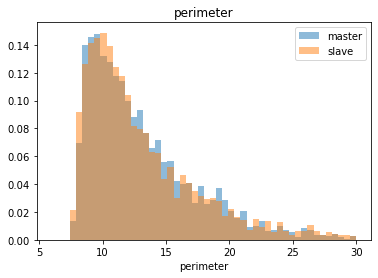

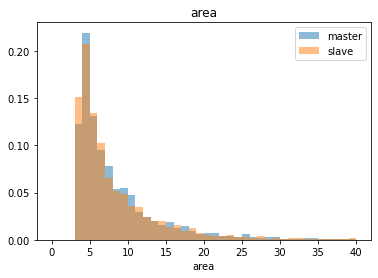

In [8]:
for var, bins, density in [
    ('Dmax', np.linspace(0, 200, 21)* 0.060, False),
    ('Dmin', np.linspace(0, 200, 21)* 0.060, False),

                  ('aspectRatio', np.linspace(0, 1, 11), True),
                  ('angle', np.linspace(0, 90, 9), True),
                  ('minVal', np.linspace(0,256,26), True),
                  ('maxVal', np.linspace(0,256,26), True),
                  ('blur', np.linspace(0,35,36), True),
                  ('perimeter', np.linspace(100,500,51)* 0.060, True),
                  ('area', np.linspace(0,40,41), True),

                          ]:
    plt.figure()
    for inst in ['master', 'slave']:
        try:
            dat[inst][var].plot.hist(bins=bins, label=inst, alpha=0.5, density=density)
        except:
            pass
    plt.title(var)
    plt.legend()

In [18]:
(dat['master']['Dmax'] > 0).sum(), (dat['slave']['Dmax'] > 0).sum()

(<xarray.DataArray 'Dmax' ()>
 array(2795),
 <xarray.DataArray 'Dmax' ()>
 array(2370))

In [19]:
2795+2370

5165

In [35]:
ls /Users/mmaahn/data/VISSS_data

mosaic_extracted/
mosaic_interesting/
visss1_visss_master_S1145792_20191115-052000.jpg*
visss1_visss_master_S1145792_20191115-052000.mov*
visss1_visss_master_S1145792_20191115-052000.mov.retrieval_v20200822.nc
visss1_visss_master_S1145792_20191115-052000.txt*
visss1_visss_master_S1145792_20191115-052500.jpg*
visss1_visss_master_S1145792_20191115-052500.mov*
visss1_visss_master_S1145792_20191115-052500.mov.particle_0.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_1.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_10.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_100.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_101.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_102.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_103.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_104.png
visss1_visss_master_S1145792_20191115-052500.mov.particle_105.png
visss1_visss_master_S1145792_20191115-052500.mov.pa